In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
import optax
import equinox as eqx

from flex import FuzzyVariable
from flex.fiss import TSK
from flex.visualize import plot_mfs

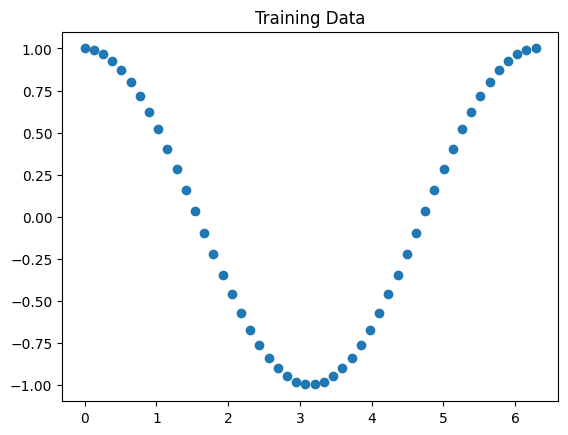

In [2]:
f = lambda x: np.cos(x)

xs = np.linspace(0.0, 2.0*np.pi, 50)
ys = f(xs)

plt.scatter(xs, ys)
plt.title("Training Data")
plt.show()

In [3]:
# define models

minval = 0.0
maxval = 2.0*jnp.pi

order = 0
key = jax.random.PRNGKey(0)

fv_tri = FuzzyVariable.ruspini(5, kind="triangle", name="Triangle FV")
fv_trap = FuzzyVariable.ruspini(5, kind="trapezoid", name="Trapezoid FV")
fv_gauss = FuzzyVariable.gaussian(5, name="Gaussian FV")
fv_mixed = FuzzyVariable.manual(
    mfs=["trapezoid", "gaussian", "triangle", "gaussian", "trapezoid"],
    name="Mixed FV",
)

fis1 = TSK.init((fv_tri,), order=order, key=key, name="Triangle FIS")
fis2 = TSK.init((fv_trap,), order=order, key=key, name="Trapezoid FIS")
fis3 = TSK.init((fv_gauss,), order=order, key=key, name="Gaussian FIS")
fis4 = TSK.init((fv_mixed,), order=order, key=key, name="Mixed FIS")

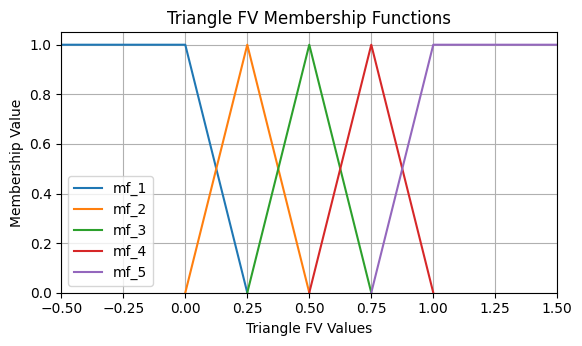

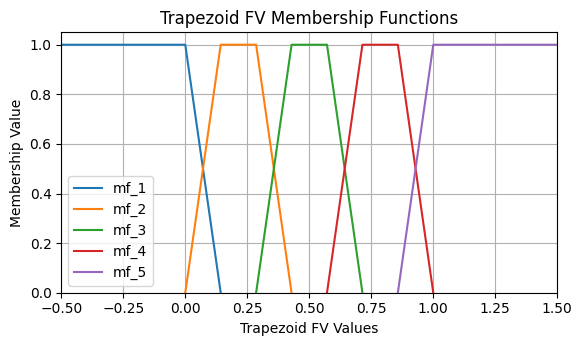

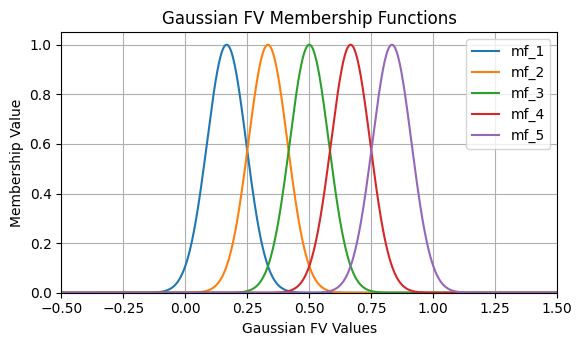

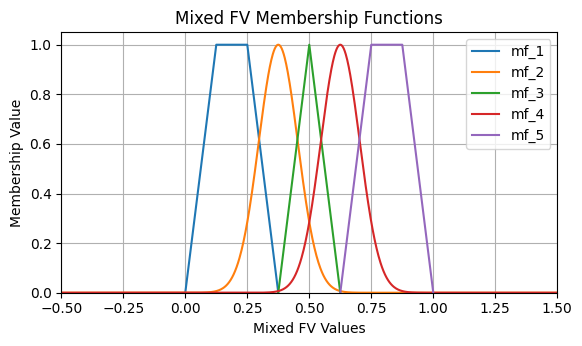

In [4]:
plot_mfs(fv_tri)
plot_mfs(fv_trap)
plot_mfs(fv_gauss)
plot_mfs(fv_mixed)

In [5]:
# Define training parameters
lr = 1e-1
epochs = 2000

optim = optax.adam(learning_rate=lr)

@eqx.filter_value_and_grad
def loss_fn(model, x, y):
    pred_y = model(x).squeeze()
    return jnp.mean((y - pred_y)**2)

@eqx.filter_jit
def step(model, x, y, opt_state):
    loss, grads = loss_fn(model, x, y)
    updates, opt_state = optim.update(grads, opt_state)
    model = eqx.apply_updates(model, updates)
    return loss, model, opt_state

train_xs = xs[:, None] / (2.0*np.pi)  # NOTE: last dim must be of the number of inputs

In [6]:
msg = f"Starting Training for {fis1.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis1)

for epoch in range(epochs):
    loss, fis1, opt_state = step(fis1, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis1.name} Training Finished!\n")

Starting Training for Triangle FIS
----------------------------------
epoch 1/2000 | loss=0.5068063139915466
epoch 2/2000 | loss=0.4331241548061371
epoch 3/2000 | loss=0.3549216389656067
epoch 4/2000 | loss=0.2907731235027313
epoch 5/2000 | loss=0.234897181391716
epoch 6/2000 | loss=0.18251262605190277
epoch 7/2000 | loss=0.1369076818227768
epoch 8/2000 | loss=0.10076424479484558
epoch 9/2000 | loss=0.07253104448318481
epoch 10/2000 | loss=0.049334459006786346
epoch 11/2000 | loss=0.030817976221442223
epoch 12/2000 | loss=0.018427040427923203
epoch 13/2000 | loss=0.012299352325499058
epoch 14/2000 | loss=0.009941961616277695
epoch 15/2000 | loss=0.009549278765916824
epoch 16/2000 | loss=0.011162065900862217
epoch 17/2000 | loss=0.015037541277706623
epoch 18/2000 | loss=0.020299753174185753
epoch 19/2000 | loss=0.025169171392917633
epoch 20/2000 | loss=0.028951449319720268
epoch 21/2000 | loss=0.0320960208773613
epoch 22/2000 | loss=0.034650322049856186
epoch 23/2000 | loss=0.0360209532

In [7]:
msg = f"Starting Training for {fis2.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis2)

for epoch in range(epochs):
    loss, fis2, opt_state = step(fis2, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis2.name} Training Finished!\n")

Starting Training for Trapezoid FIS
-----------------------------------
epoch 1/2000 | loss=0.508531928062439
epoch 2/2000 | loss=0.4216700792312622
epoch 3/2000 | loss=0.34439152479171753
epoch 4/2000 | loss=0.27357664704322815
epoch 5/2000 | loss=0.20860403776168823
epoch 6/2000 | loss=0.15077060461044312
epoch 7/2000 | loss=0.10150003433227539
epoch 8/2000 | loss=0.06262993067502975
epoch 9/2000 | loss=0.035521674901247025
epoch 10/2000 | loss=0.019664548337459564
epoch 11/2000 | loss=0.014031045138835907
epoch 12/2000 | loss=0.015392372384667397
epoch 13/2000 | loss=0.020239155739545822
epoch 14/2000 | loss=0.025897573679685593
epoch 15/2000 | loss=0.03055364079773426
epoch 16/2000 | loss=0.03372877836227417
epoch 17/2000 | loss=0.03480619937181473
epoch 18/2000 | loss=0.03421831876039505
epoch 19/2000 | loss=0.031256306916475296
epoch 20/2000 | loss=0.026997767388820648
epoch 21/2000 | loss=0.022037535905838013
epoch 22/2000 | loss=0.016927186399698257
epoch 23/2000 | loss=0.01251

In [8]:
msg = f"Starting Training for {fis3.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis3)

for epoch in range(epochs):
    loss, fis3, opt_state = step(fis3, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis3.name} Training Finished!\n")

Starting Training for Gaussian FIS
----------------------------------
epoch 1/2000 | loss=0.5045416355133057
epoch 2/2000 | loss=0.3917118012905121
epoch 3/2000 | loss=0.29123249650001526
epoch 4/2000 | loss=0.20754936337471008
epoch 5/2000 | loss=0.1438581794500351
epoch 6/2000 | loss=0.09994743019342422
epoch 7/2000 | loss=0.07273157685995102
epoch 8/2000 | loss=0.057660870254039764
epoch 9/2000 | loss=0.050576601177453995
epoch 10/2000 | loss=0.04652862995862961
epoch 11/2000 | loss=0.04174237325787544
epoch 12/2000 | loss=0.033850956708192825
epoch 13/2000 | loss=0.022798888385295868
epoch 14/2000 | loss=0.011197204701602459
epoch 15/2000 | loss=0.0037631846498697996
epoch 16/2000 | loss=0.004728768952190876
epoch 17/2000 | loss=0.011897074989974499
epoch 18/2000 | loss=0.015998512506484985
epoch 19/2000 | loss=0.014358079060912132
epoch 20/2000 | loss=0.009735130704939365
epoch 21/2000 | loss=0.005851247347891331
epoch 22/2000 | loss=0.005209874827414751
epoch 23/2000 | loss=0.007

In [9]:
msg = f"Starting Training for {fis4.name}"
print(msg)
print("-"*len(msg))

opt_state = optim.init(fis4)

for epoch in range(epochs):
    loss, fis4, opt_state = step(fis4, train_xs, ys, opt_state)
    loss = loss.item()
    print(f"epoch {epoch+1}/{epochs} | loss={loss}")

print(f"{fis4.name} Training Finished!\n")

Starting Training for Mixed FIS
-------------------------------
epoch 1/2000 | loss=0.5051389336585999
epoch 2/2000 | loss=0.4069281816482544
epoch 3/2000 | loss=0.31933262944221497
epoch 4/2000 | loss=0.24364307522773743
epoch 5/2000 | loss=0.18288803100585938
epoch 6/2000 | loss=0.13502752780914307
epoch 7/2000 | loss=0.09999231994152069
epoch 8/2000 | loss=0.08014721423387527
epoch 9/2000 | loss=0.06185303255915642
epoch 10/2000 | loss=0.06609809398651123
epoch 11/2000 | loss=0.08925912529230118
epoch 12/2000 | loss=0.10058590769767761
epoch 13/2000 | loss=0.11319045722484589
epoch 14/2000 | loss=0.12010054290294647
epoch 15/2000 | loss=0.12011167407035828
epoch 16/2000 | loss=0.11561054736375809
epoch 17/2000 | loss=0.10966584831476212
epoch 18/2000 | loss=0.0992971807718277
epoch 19/2000 | loss=0.09569621831178665
epoch 20/2000 | loss=0.08478803187608719
epoch 21/2000 | loss=0.0776522159576416
epoch 22/2000 | loss=0.07375479489564896
epoch 23/2000 | loss=0.06991815567016602
epoch 

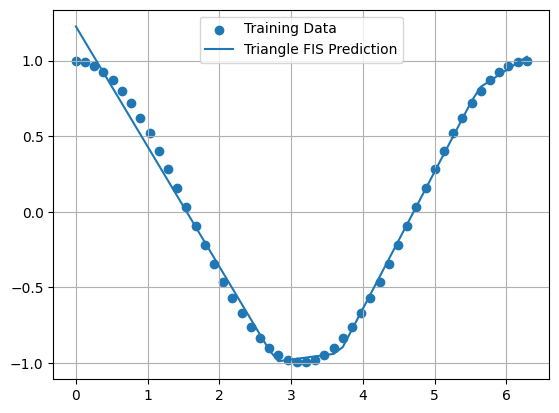

In [10]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis1(train_xs), label=f"{fis1.name} Prediction")
plt.grid()
plt.legend()
plt.show()

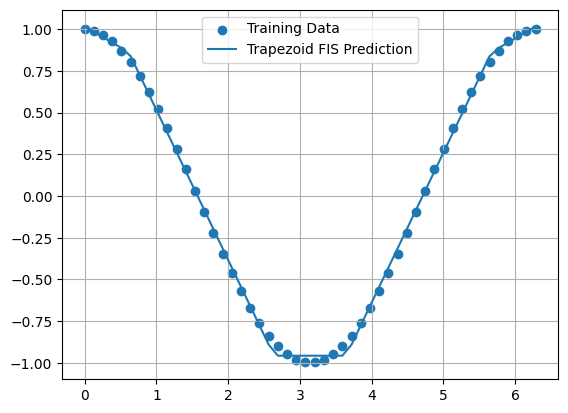

In [11]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis2(train_xs), label=f"{fis2.name} Prediction")
plt.grid()
plt.legend()
plt.show()

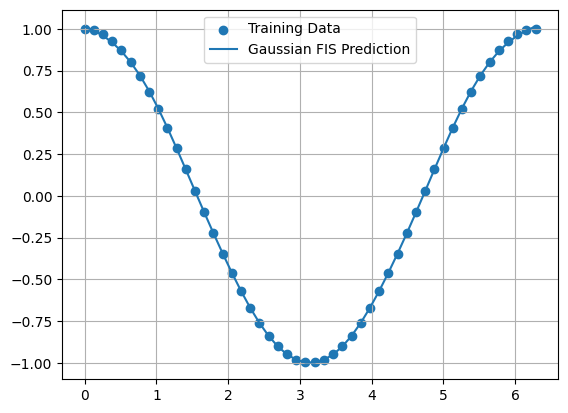

In [12]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis3(train_xs), label=f"{fis3.name} Prediction")
plt.grid()
plt.legend()
plt.show()

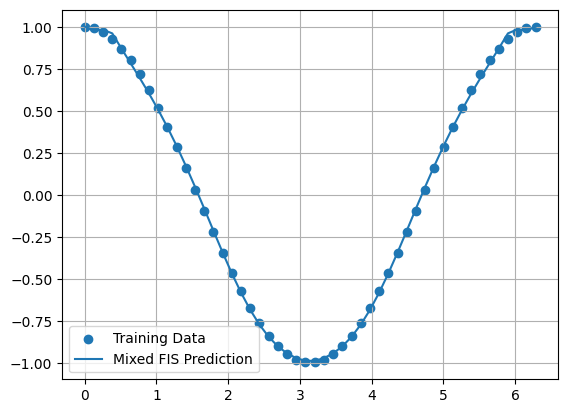

In [13]:
plt.scatter(xs, ys, label="Training Data")
plt.plot(xs, fis4(train_xs), label=f"{fis4.name} Prediction")
plt.grid()
plt.legend()
plt.show()

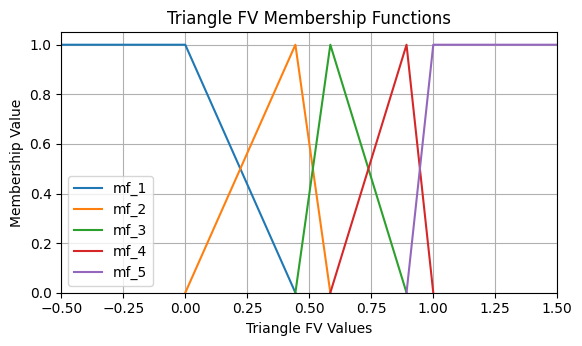

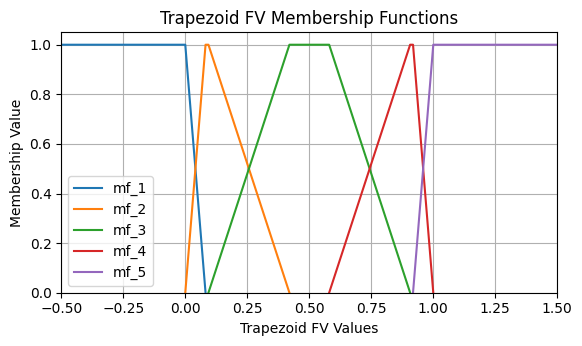

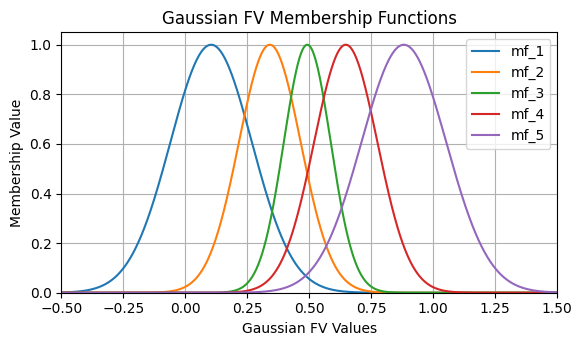

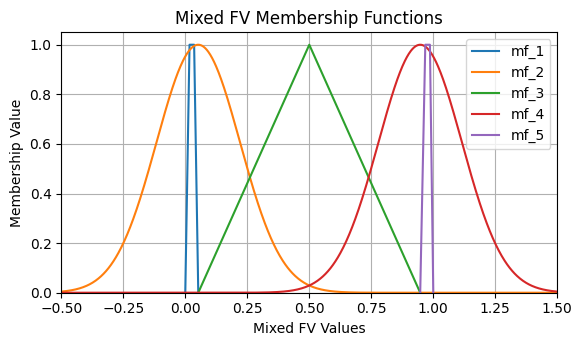

In [14]:
plot_mfs(fis1.input_vars[0])
plot_mfs(fis2.input_vars[0])
plot_mfs(fis3.input_vars[0])
plot_mfs(fis4.input_vars[0])

In [15]:
def count_parameters(model: eqx.Module) -> int:
    leaves = jax.tree_util.tree_leaves(
        eqx.filter(model, eqx.is_array)
    )
    return sum(leaf.size for leaf in leaves)

In [16]:
count_parameters(fis1)

14

In [17]:
count_parameters(fis2)

17

In [18]:
count_parameters(fis3)

21

In [19]:
count_parameters(fis4)

20